# Introduction

This project aims to identify factors that could prevent students from receiving a valuable education. Many professors preach that coming to class on time and every day is the key to learning and passing with a satisfactory grade, but in the day and age of evolving technology with a generation that has grown up completely surrounded by it; is attendance really that large of a factor?

Many students can and will skip class to have jobs, spend quality time with family, work on homework, enjoy hobbies and much much more; especially when these same students
can access all of the resources online that other students view in class. Can students spend less time in the classroom but still do just as well? I’ll analyze exactly what factors play a role in students’ grades and how important each is.

---

The dataset was collected on Kaggle and is synthetically generated; however, this is in my opinion likely an accurate enough dataset to take certain insights from. I would not use this data to create student assistance  programs at just any school, but this could be used to develop techniques to solve issues in our education system. The techniques can then be adapted and implemented based on actual data collected from schools around the world. In this database, there are 6607 records over the course of one class schedule whether that be a semester or year.

---

Because the data is synthetic, there was no need to clean or wrangle the data. Each feature has a standardized response set. For example, Teacher quality is listed as either: none, low, medium, or high. Nothing else.

There are a significant amount of missing values for teacher quality, parental education level, and distance from home; however, considering that there are a toal of 6607 rows I do not see this as something imperative to fix. These 90 values are only 1.3 percent of the total values from just that column.

---

>The columns are as follows:
>
>Hours_Studied
>
>Attendance
>
>Parental_Involvement
>
>Access_to_Resources
>
>Extracurrical_Activities
>
>Sleep_Hours
>
>Previous_Scores
>
>Motivation_Level
>
>Internet_Access
>
>Tutoring_Sessions
>
>Family_Income
>
>Teacher_Quality
>
>School_Type
>
>Peer_Influence
>
>Physical_Activity
>
>Learning_Disabilities
>
>Parental_Education_Level
>
>Distance_from_Home
>
>Gender
>
>Exam_Score

---

Of the 6607 rows and 20 columns, each is either a bool, int, or object. Determining data types for each variable is fairly intuitive.

Basic statistics that I believe will have the highest impact on a students grade:
- Mean hours studied per week: 19.98
- Mean percentage of class attendended: 79.98
- Count of low parental involvement:1337
- Count of high parental involvement: 1908
- Has internet access: 6607

# Conclusions

The data analysis below will show that attendance does in fact have a significant impact on student scores. My original hypothesis and common knowledge would lead one to assume that factors like parental involvement and internet access would be factors that determine the attendance percentage of students, but the last graphs show the exact opposite. Internet access has no effect, gender has no effect, and hours studied has no effect; the only one to sway it at least a little bit was parental involvement and hour studied. However, not enough to really make decisions on techniques to help students.

# Data Sample

In [1]:
import pandas as pd
data = pd.read_csv('student_performance.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,True,7,73,Low,True,0,Low,Medium,Public,Positive,3,True,High School,Near,Male,67
1,19,64,Low,Medium,True,8,59,Low,True,2,Medium,Medium,Public,Negative,4,True,College,Moderate,Female,61
2,24,98,Medium,Medium,True,7,91,Medium,True,2,Medium,Medium,Public,Neutral,4,True,Postgraduate,Near,Male,74
3,29,89,Low,Medium,True,8,98,Medium,True,1,Medium,Medium,Public,Negative,4,True,High School,Moderate,Male,71
4,19,92,Medium,Medium,True,6,65,Medium,True,3,Medium,High,Public,Neutral,4,True,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,True,7,76,Medium,True,1,High,Medium,Public,Positive,2,True,High School,Near,Female,68
6603,23,76,High,Medium,True,8,81,Medium,True,3,Low,High,Public,Positive,2,True,High School,Near,Female,69
6604,20,90,Medium,Low,True,6,65,Low,True,3,Low,Medium,Public,Negative,2,True,Postgraduate,Near,Female,68
6605,10,86,High,High,True,6,91,High,True,2,Low,Medium,Private,Positive,3,True,High School,Far,Female,68


# Cleaning and Wrangling

In [2]:
print('-----Data Types-----')
print(data.dtypes)
print()
print('-----Count Of Missing Values-----')
print(data.isnull().sum())
print()
print('-----Values For Each Object Column-----')
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {data[column].unique()}")

-----Data Types-----
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities      bool
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access                 bool
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities           bool
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

-----Count Of Missing Values-----
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours              

# Analysis

This is a simple score distribution for each student. Score stats are listed below it.

Notably, the median is 67% for every student when ignoring all other variables.

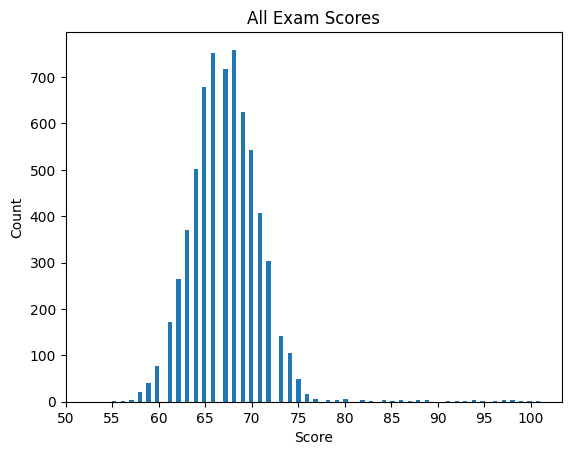

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

#score distribution
scores = data['Exam_Score']

plt.title('All Exam Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.hist(scores, bins=100)
plt.xticks(ticks=range(50, 101, 5))

plt.show()

In [18]:
#score metrics
print('Lowest score: ' + str(min(scores)))
print('Highest score: ' + str(max(scores)))
print('Mean score: ' + str(round(scores.mean(),2)))
print('Median score: ' + str(scores.median()))

Lowest score: 55
Highest score: 101
Mean score: 67.24
Median score: 67.0


---

Every single one of the 6607 students in this data set had some form of internet access so this graph does not do much to compare access vs no access. However, it does prove that students with internet access can do well or can do not well. Scores range from 55% to 101%.

We can conclude that internet access has no effect on exam scores.

Internet_Access
True    6607
Name: count, dtype: int64


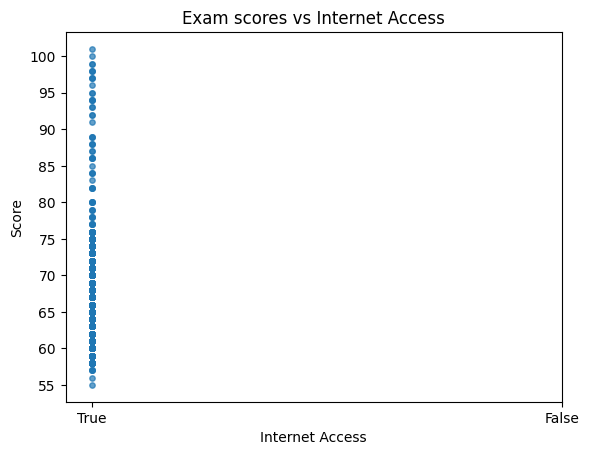

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#scores with and without internet access
scores = data['Exam_Score']
internet = data['Internet_Access'].map({True: 'True', False: 'False'})

plt.title('Exam scores vs Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Score')

plt.scatter(internet, scores, alpha=0.7, s=15)

plt.xticks(['False', 'True'])
y_ticks = np.arange(min(scores), max(scores), step=5)
plt.yticks(y_ticks)

plt.show()

---

The graph below compares genders and their exam scores. Simply because I've attempted to fit all 6607 values on the graph, at first glance it seems that the females beat out the males by a decent margin. I included the actual mean and median values under the graph that show the distributions are actually quite similar. The mean scores are only .01% different while the median is the same.

We can conclude that gender does not have any correlation with exam scores.

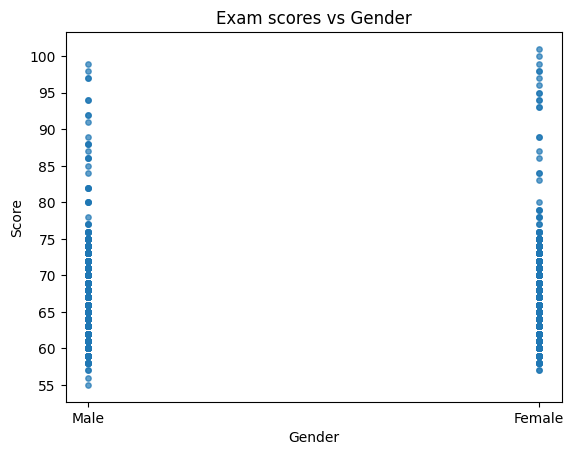

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#scores with and without internet access
scores = data['Exam_Score']
gender = data['Gender']

plt.title('Exam scores vs Gender')
plt.xlabel('Gender')
plt.ylabel('Score')

plt.scatter(gender, scores, alpha=0.7, s=15)

y_ticks = np.arange(min(scores), max(scores), step=5)
plt.yticks(y_ticks)

plt.show()

In [57]:
male = data[data['Gender'] == 'Male']['Exam_Score']
female = data[data['Gender'] == 'Female']['Exam_Score']

print('Male scores mean: ' + str(round(male.mean(),2)))
print('Female scores mean: ' + str(round(female.mean(),2)))
print()
print('Male scores median: ' + str(round(male.median(),2)))
print('Female scores median: ' + str(round(female.median(),2)))

Male scores mean: 67.23
Female scores mean: 67.24

Male scores median: 67.0
Female scores median: 67.0


---


This graph is the first that displays actual useful data: the regression line with positive slope leads us to believe that the more you study the better you'll do on your exams. There are outliers, but not enough to pull the regression line enough to make a difference. The positive trend is also clearly visible without the regression line.

More studying will mean you do better on your exams.

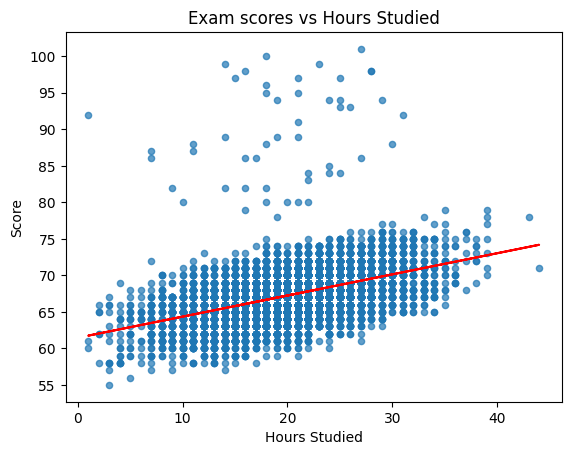

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#scores with and without internet access
scores = data['Exam_Score']
hours = data['Hours_Studied']

#regression line
X = hours.values.reshape(-1, 1)
y = scores
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

#scatter labels
plt.title('Exam scores vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Score')

plt.scatter(hours, scores, alpha=.7, s=20)
plt.plot(hours, y_pred, color='red')

y_ticks = np.arange(min(scores), max(scores), step=5)
plt.yticks(y_ticks)

plt.show()

---

Like the internet access graph, this graph is a little difficult to interpret. It seems that the graph shows low exam scores with low parental involvement, but the other two variables are unclear. I included some more metrics below the graph that describe the data in more detail. Those metrics show that the average scores for low, medium, and high parental involvement increase with parental involvement. The average score for high parental involvement is 68%.

We can conclude that parental involvement has an influence on exam scores even though its not much.

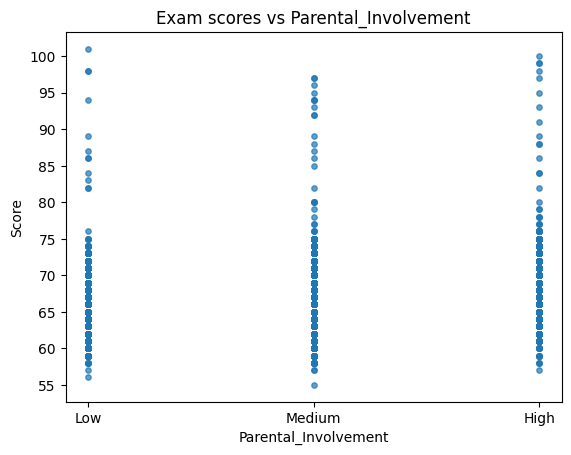

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#scores with and without internet access
scores = data['Exam_Score']
parent = data['Parental_Involvement']

plt.title('Exam scores vs Parental_Involvement')
plt.xlabel('Parental_Involvement')
plt.ylabel('Score')

plt.scatter(parent, scores, alpha=0.7, s=15)

y_ticks = np.arange(min(scores), max(scores), step=5)
plt.yticks(y_ticks)

plt.show()

In [91]:
#low
low = data['Parental_Involvement'][data['Parental_Involvement']=='Low'].count()
print('Low parental involvement: ' +str(low))

low_avg_score = data['Exam_Score'][data['Parental_Involvement'] == 'Low'].mean()
print('Average score for Low parental involvement: ' + str(low_avg_score))


#medium
medium = data['Parental_Involvement'][data['Parental_Involvement']=='Medium'].count()
print('Medium parental involvement: ' +str(medium))

medium_avg_score = data['Exam_Score'][data['Parental_Involvement'] == 'Medium'].mean()
print('Average score for Medium parental involvement: ' + str(medium_avg_score))


#high
high = data['Parental_Involvement'][data['Parental_Involvement']=='High'].count()
print('High parental involvement: ' +str(high))

high_avg_score = data['Exam_Score'][data['Parental_Involvement'] == 'High'].mean()
print('Average score for High parental involvement: ' + str(high_avg_score))

Low parental involvement: 1337
Average score for Low parental involvement: 66.35826477187734
Medium parental involvement: 3362
Average score for Medium parental involvement: 67.09815585960737
High parental involvement: 1908
Average score for High parental involvement: 68.09276729559748


---

This graph answers our research question directly: attendance vs exam scores. Again this plot is very intuitive to read but I've included the regression line to make it painfully obvious. Students who have higher attendance will likely do better in class. Again there are outliers but not enough to modify the outcome.

If you attend class you'll likely do well on your exams.

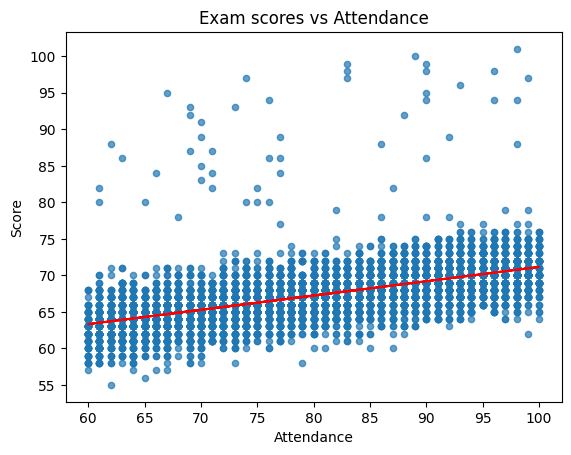

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#scores with and without internet access
scores = data['Exam_Score']
attendance = data['Attendance']

#regression line
X = attendance.values.reshape(-1, 1)
y = scores
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

#scatter labels
plt.title('Exam scores vs Attendance')
plt.xlabel('Attendance')
plt.ylabel('Score')

plt.scatter(attendance, scores, alpha=.7, s=20)
plt.plot(attendance, y_pred, color='red')

y_ticks = np.arange(min(scores), max(scores), step=5)
plt.yticks(y_ticks)

plt.show()

---

### What causes students to attend class?

If higher attendance results in higher exam grades, what makes students go to class? What can we do to make students go to class and earn better grades?

I've plotted every variable against attendance and calculated correlation using a random forest model. Hours studied is the only variable with a notable effect on attendance. This correlation value is still very low. In order to make a more educated conclusion we would require more data about student lifestyles like: does the student have a lot of friends in school, do they go because they're learning something they like, what are students doing when they skip school, etc.

This calculation also reinforces the correlation between attendance and exam scores with a value of .51.

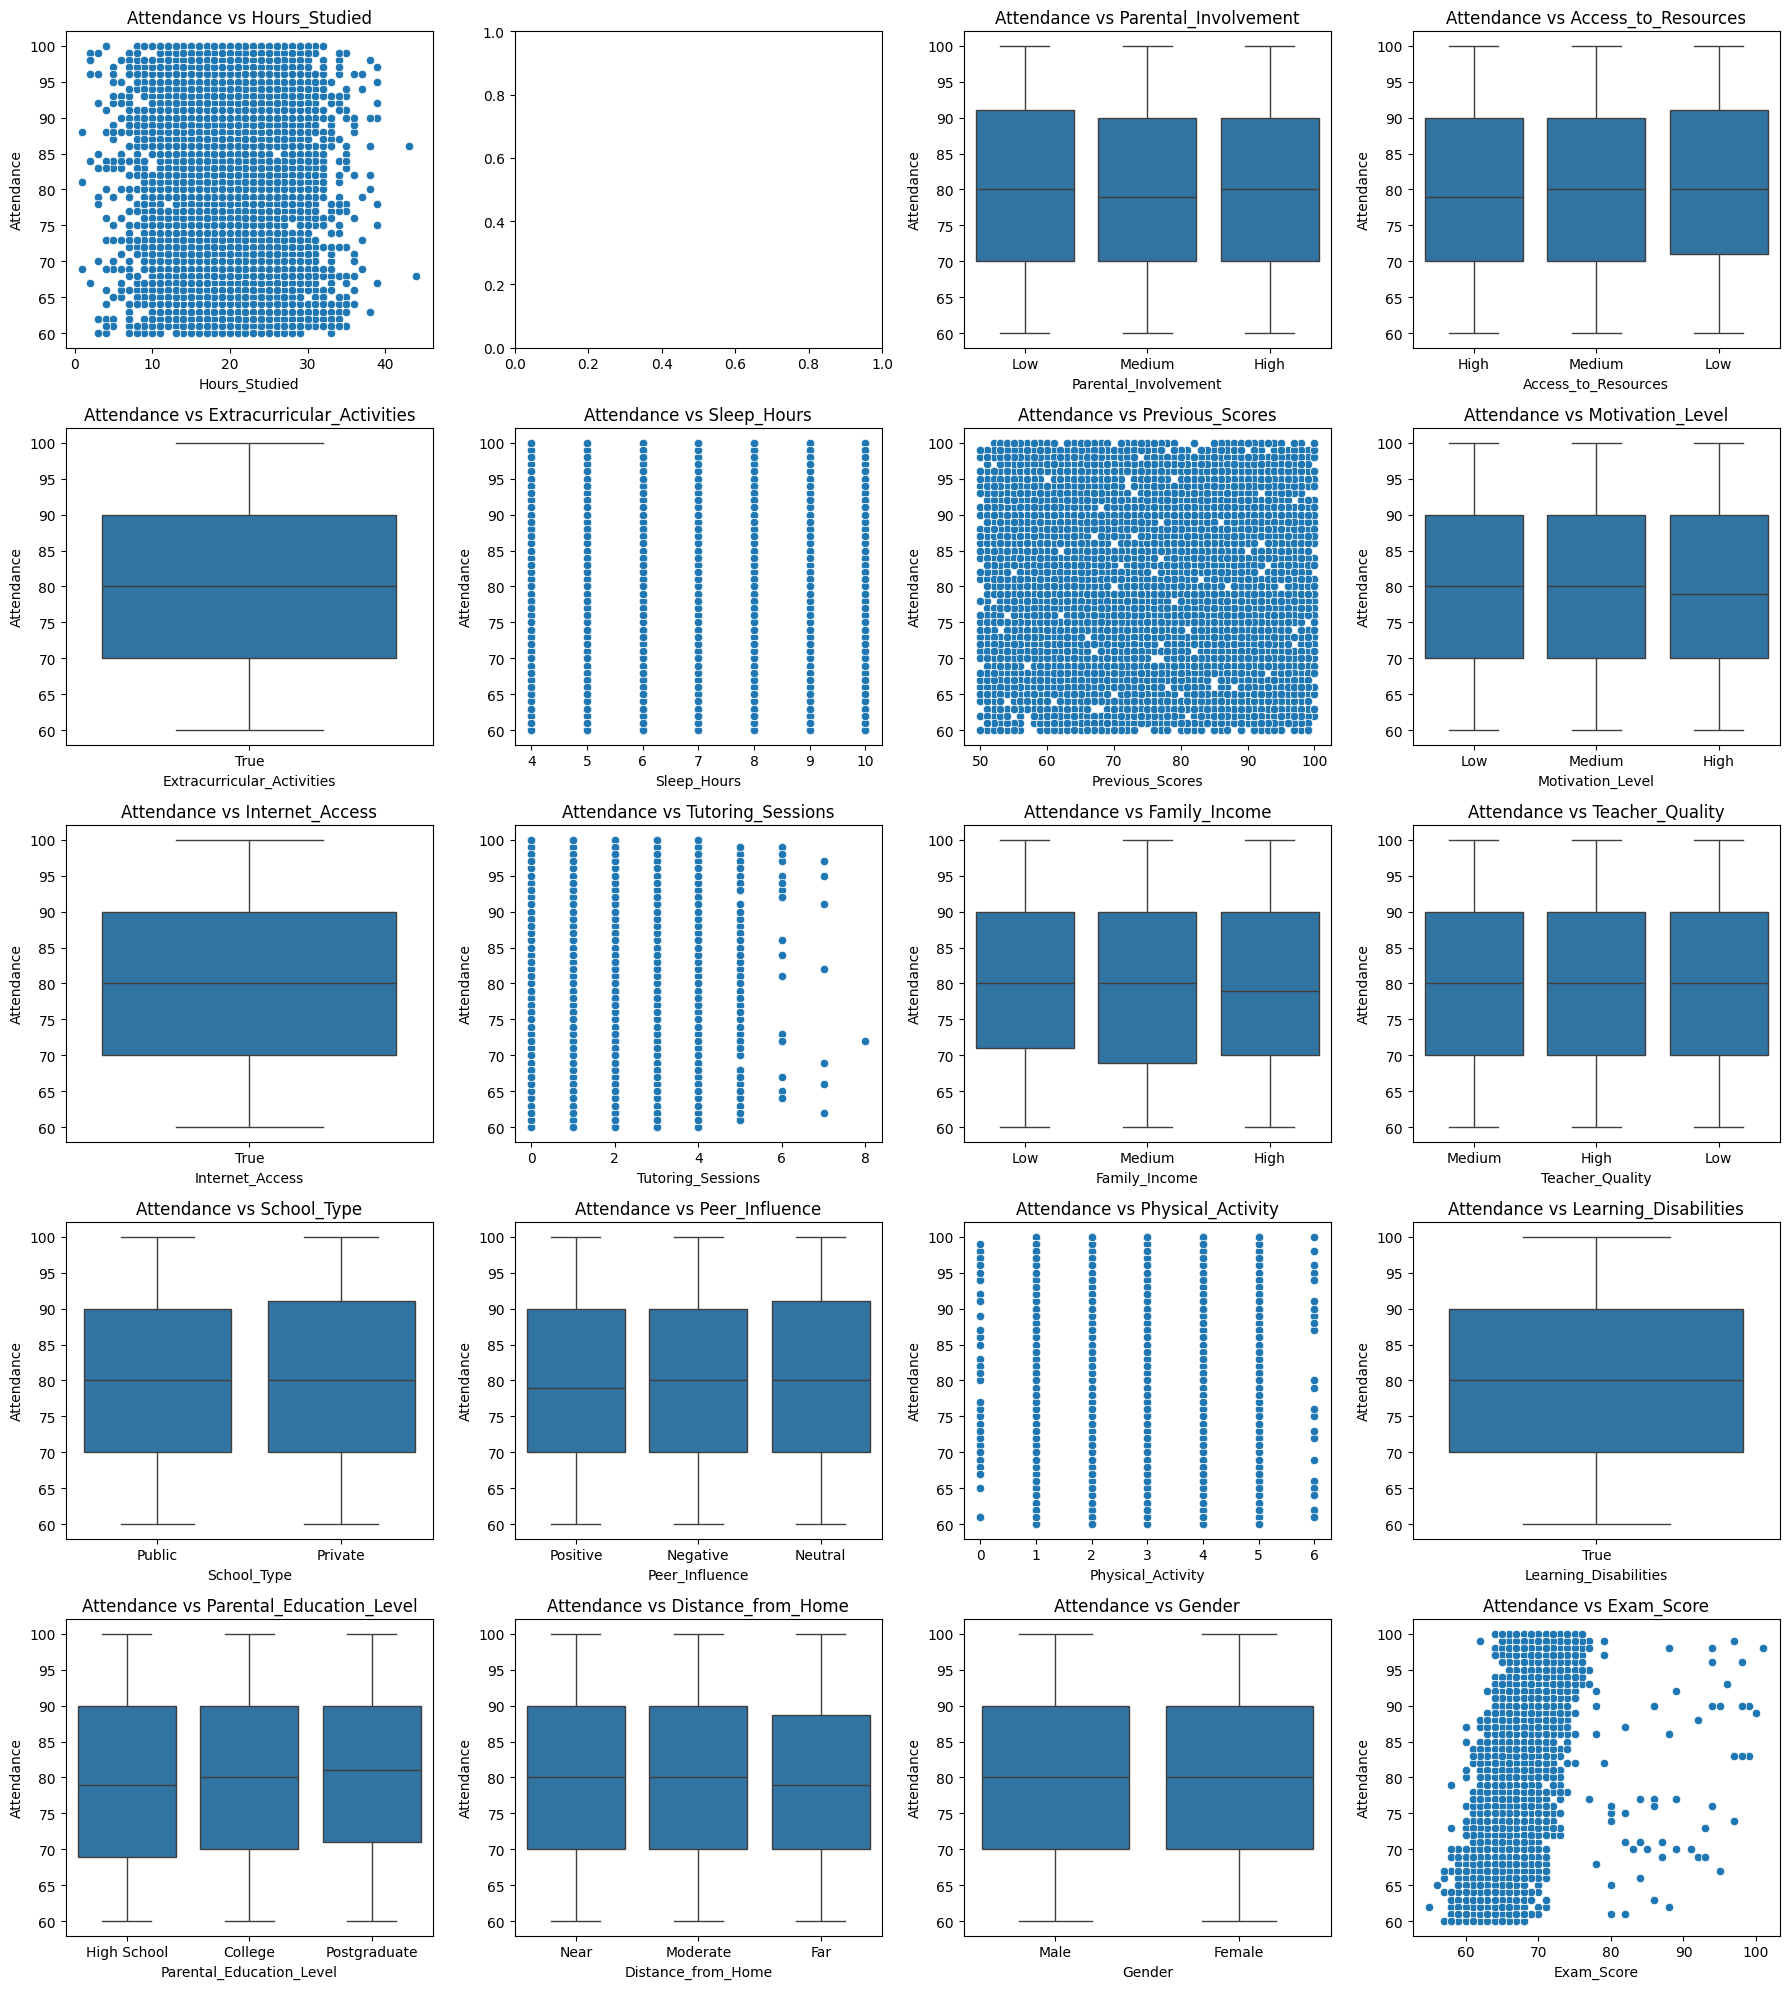

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
             'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
             'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity',
             'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

fig, axes = plt.subplots(5, 4, figsize=(18, 20))
axes = axes.flatten()

for idx, var in enumerate(variables):
    if var == 'Attendance':
        continue
    #numeric
    if data[var].dtype in ['int64', 'float64']:
        sns.scatterplot(x=data[var], y=data['Attendance'], ax=axes[idx])
        axes[idx].set_title(f'Attendance vs {var}')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Attendance')
    #categorical
    elif data[var].dtype == 'object':
        sns.boxplot(x=data[var], y=data['Attendance'], ax=axes[idx])
        axes[idx].set_title(f'Attendance vs {var}')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Attendance')
    #bool
    elif data[var].dtype == 'bool':
        sns.boxplot(x=data[var], y=data['Attendance'], ax=axes[idx])
        axes[idx].set_title(f'Attendance vs {var}')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Attendance')

plt.tight_layout()
plt.show()


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#features and target
X = data.drop(columns=['Attendance'])
y = data['Attendance']

X = pd.get_dummies(X)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#importance rating
importances = rf.feature_importances_
features = X.columns

feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feature_importance)

Exam_Score                               0.508934
Hours_Studied                            0.172995
Previous_Scores                          0.073188
Tutoring_Sessions                        0.034954
Access_to_Resources_High                 0.019228
Parental_Involvement_High                0.016699
Parental_Involvement_Low                 0.015548
Sleep_Hours                              0.015229
Access_to_Resources_Low                  0.015056
Physical_Activity                        0.014465
Peer_Influence_Positive                  0.008615
Family_Income_Low                        0.008048
Parental_Education_Level_High School     0.007208
Motivation_Level_Low                     0.007098
Peer_Influence_Negative                  0.007084
Motivation_Level_High                    0.006688
Parental_Education_Level_Postgraduate    0.006140
Distance_from_Home_Near                  0.005945
Teacher_Quality_High                     0.005480
Family_Income_High                       0.005006
